
# Recognizing hand-written digits using Structured RerF


An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This was adapted from: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

Automatically created module for IPython interactive environment


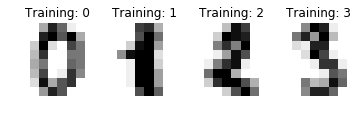

In [1]:
%matplotlib inline

print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets,  metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))



In [2]:
from rerf.rerfClassifier import rerfClassifier

# Create a classifier: Structured RerF
clf = rerfClassifier(projection_matrix="S-RerF", 
                            image_height=8,
                            image_width=8,
                            n_estimators = 100,
                           )

# We learn the digits on the first half of the digits
clf.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

rerfClassifier(feature_combinations=1.5, image_height=8, image_width=8,
               max_depth=None, max_features='auto', min_parent=1,
               n_estimators=100, n_jobs=None, patch_height_max=None,
               patch_height_min=1, patch_width_max=None, patch_width_min=1,
               projection_matrix='S-RerF', random_state=None)

Classification report for classifier rerfClassifier(feature_combinations=1.5, image_height=8, image_width=8,
               max_depth=None, max_features='auto', min_parent=1,
               n_estimators=100, n_jobs=None, patch_height_max=None,
               patch_height_min=1, patch_width_max=None, patch_width_min=1,
               projection_matrix='S-RerF', random_state=None):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        88
           1       0.95      0.82      0.88        91
           2       0.96      0.87      0.91        86
           3       0.85      0.87      0.86        91
           4       0.94      0.91      0.93        92
           5       0.81      0.93      0.87        91
           6       0.94      0.99      0.96        91
           7       0.94      0.96      0.95        89
           8       0.91      0.84      0.88        88
           9       0.85      0.95      0.90        92

    accuracy         

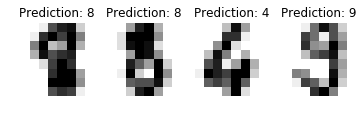

Score 0.9121245828698554


In [3]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = clf.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

print("Score", clf.score(data[n_samples // 2:], expected))